2018/10/27

# 第３章一般線形モデル(GLM)

## データ準備

In [3]:
d <- read.csv("./data/data3a.csv")
head(d)

y,x,f
6,8.31,C
6,9.44,C
6,9.50,C
12,9.07,C
10,10.16,C
4,8.32,C


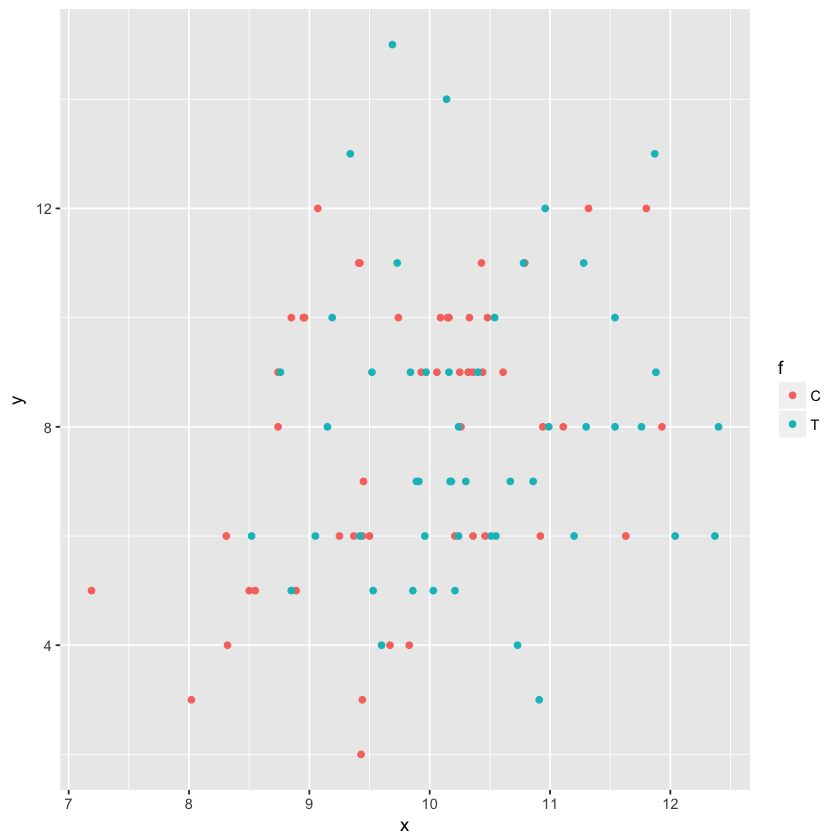

In [4]:
library(ggplot2)
ggplot(d,aes(x=x,y=y,col=f))+
geom_point()

## ポアソン回帰の統計モデル

### 線形予測子と対数リンク関数

λi を、今回は植物のサイズである「説明変数 xi 」の関数で定義すると

λi = exp(β1 + β2xi)

この式の両辺を対数変換

log λi = β1 + β2xi

右辺 β1 + β2xi が 線形予測子：二次関数のような曲線でも<strong>線形予測子</strong> <br>
左辺 log λi が リンク関数：今回は対数関数で<strong>「対数リンク関数（log link function）」⇄「恒等リンク関数」</strong>と呼ぶ<br>

ポアソン回帰のGL<で対数リンク関数を利用する理由はこれが推定計算に都合よく、わかりやすいから。

### ポアソン回帰

ポアソン回帰。つまり観測データに対してポアソン分布を使った統計モデルの当てはめにおいて対数尤度（対数リンク関数）が最大になる線形予測子のパラメータ$\beta$の推定値を求める必要がある

In [5]:
fit <- glm(y~x,data=d,family=poisson)
fit


Call:  glm(formula = y ~ x, family = poisson, data = d)

Coefficients:
(Intercept)            x  
    1.29172      0.07566  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.99 	AIC: 474.8

In [6]:
summary(fit)


Call:
glm(formula = y ~ x, family = poisson, data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3679  -0.7348  -0.1775   0.6987   2.3760  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.29172    0.36369   3.552 0.000383 ***
x            0.07566    0.03560   2.125 0.033580 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 84.993  on 98  degrees of freedom
AIC: 474.77

Number of Fisher Scoring iterations: 4


<strong>標準偏差(Estimate Std.)</strong><br>
同じ調査方法で同数の別のデータを取り直してみるすると、最尤推定値が結構変わるのでそのばらつき具合

In [9]:
#このモデルの最尤対数尤度
logLik(fit)

'log Lik.' -235.3863 (df=2)

最大対数尤度は-235.3.そして自由度が２.つまりパラメータが2コであるという意味

### ポアソン回帰モデルによる予測

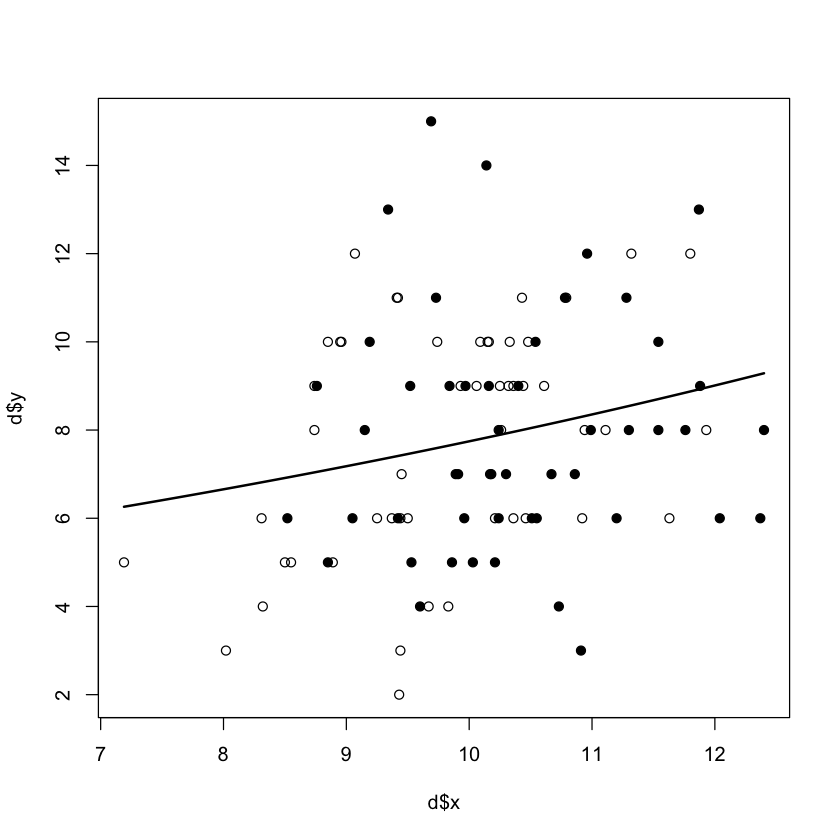

In [22]:
#ver1
plot(d$x,d$y,pch=c(21,19)[d$f])
xx <- seq(min(d$x),max(d$x),length=100)
lines(xx, exp(1.29+0.0757*xx), lwd=2)

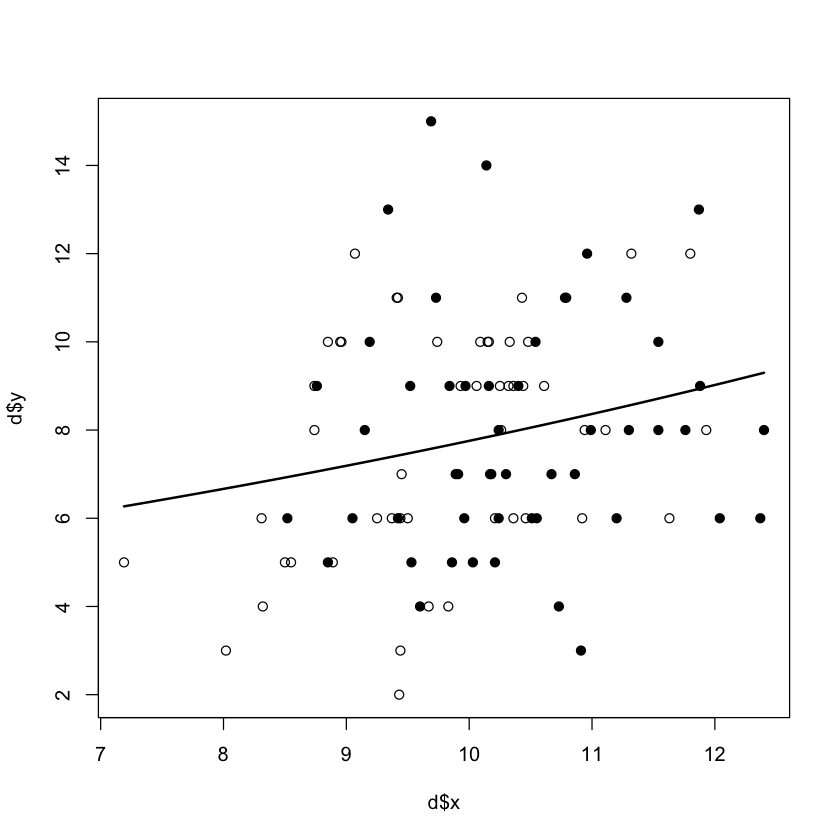

In [24]:
#ver2
plot(d$x,d$y,pch=c(21,19)[d$f])
yy<-predict(fit,newdata=data.frame(x=xx),type="response")
lines(xx,yy,lwd=2)

### 説明変数が因子型の統計モデル

In [28]:
fit.f <- glm(y~f,data=d,family=poisson)
summary(fit.f)


Call:
glm(formula = y ~ f, family = poisson, data = d)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.47515  -0.69941   0.04264   0.72467   2.25204  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.05156    0.05070  40.463   <2e-16 ***
fT           0.01277    0.07148   0.179    0.858    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 89.475  on 98  degrees of freedom
AIC: 479.25

Number of Fisher Scoring iterations: 4


In [29]:
logLik(fit.f)

'log Lik.' -237.6273 (df=2)

### 説明変数が数量型＋因子型の統計モデル

In [31]:
fit.all <- glm(y~x+f,data=d,family=poisson)
summary(fit.all)


Call:
glm(formula = y ~ x + f, family = poisson, data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3977  -0.7337  -0.2023   0.6795   2.4317  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.26311    0.36963   3.417 0.000633 ***
x            0.08007    0.03704   2.162 0.030620 *  
fT          -0.03200    0.07438  -0.430 0.667035    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 84.808  on 97  degrees of freedom
AIC: 476.59

Number of Fisher Scoring iterations: 4


In [32]:
logLik(fit.all)

'log Lik.' -235.2937 (df=3)